In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from argparse import Namespace
from PIL import Image
import timm

In [3]:
args = Namespace(img='../../../real-world-sample/healthy-0005.png')

In [4]:
NORMALIZE_MEAN = [0.485, 0.456, 0.406]
NORMALIZE_STD  = [0.229, 0.224, 0.225]
IMAGE_SIZE = 299
CLASS_NAMES = [
    'algal_spot',
    'brown_blight',
    'gray_blight',
    'healthy',
    'helopeltis',
    'red-rust',
    'red-spider-infested',
    'red_spot',
    'white-spot'
]
NUM_CLASSES = len(CLASS_NAMES)
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
test_transform = transforms.Compose([
    transforms.Resize(int(IMAGE_SIZE * 1.14)),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=NORMALIZE_MEAN, std=NORMALIZE_STD),
])

In [6]:
image = Image.open(args.img).convert("RGB")
input_tensor = test_transform(image).unsqueeze(0).to(DEVICE)

Top 5 Predictions: 
1. healthy (98.53%)
2. red_spot (0.89%)
3. algal_spot (0.45%)
4. gray_blight (0.05%)
5. helopeltis (0.05%)


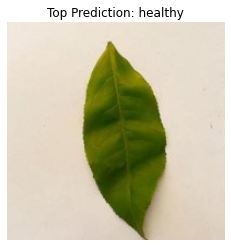

In [7]:
model = timm.create_model('inception_v4', pretrained=True, num_classes=9)
model.load_state_dict(torch.load('InceptionV4.pth'))
model = model.to(DEVICE)
model.eval()

with torch.no_grad():
    outputs = model(input_tensor)
    probs = torch.softmax(outputs, dim=1)
    top5_probs, top5_indices = torch.topk(probs, k=5, dim=1)
    
print("Top 5 Predictions: ")

for i in range(5):
    class_idx = top5_indices[0][i].item()
    class_probs = top5_probs[0][i].item()
    print(f"{i+1}. {CLASS_NAMES[class_idx]} ({class_probs * 100:.2f}%)")

plt.imshow(image)
plt.title(f"Top Prediction: {CLASS_NAMES[top5_indices[0][0].item()]}")
plt.axis('off')
plt.show()